# Question 2. AdaBoost.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# Initial weights
N = 8
D = np.ones(N) / N

# Dataset: (x1, x2, label)
data = np.array([
    [-1, 0, 1],
    [-0.5, 0.5, 1],
    [0, 1, -1],
    [0.5, 1, -1],
    [1, 0, 1],
    [1, -1, 1],
    [0, -1, -1],
    [0, 0, -1]
])

X = data[:, :2]
y = data[:, 2]

# Placeholder for the parameters at each iteration
results = []

def calculate_error(D, y, predictions):
    """Calculate the weighted error rate."""
    return np.sum(D * (predictions != y))

def calculate_stump(X, y, D):
    """Find the best decision stump for the given weights."""
    m, n = X.shape
    best_stump = None
    best_error = float('inf')
    best_predictions = None
    
    # Loop over each feature
    for j in range(n):
        # Loop over each threshold (midpoint between consecutive points)
        thresholds = np.unique(X[:, j])
        for threshold in thresholds:
            for inequality in ['lt', 'gt']:
                predictions = np.ones(m)
                if inequality == 'lt':
                    predictions[X[:, j] <= threshold] = -1
                else:
                    predictions[X[:, j] > threshold] = -1
                
                error = calculate_error(D, y, predictions)
                if error < best_error:
                    best_error = error
                    best_stump = (j, threshold, inequality)
                    best_predictions = predictions
    
    return best_stump, best_error, best_predictions

# Iteration 1
stump, error, predictions = calculate_stump(X, y, D)
alpha = 0.5 * np.log((1 - error) / error)
Z = np.sum(D * np.exp(-alpha * y * predictions))
D = (D * np.exp(-alpha * y * predictions)) / Z

# Save the results for iteration 1
results.append({
    't': 1,
    'stump': stump,
    'error': error,
    'alpha': alpha,
    'Z': Z,
    'D': D.copy()
})

results


[{'t': 1,
  'stump': (0, -0.5, 'gt'),
  'error': 0.25,
  'alpha': 0.5493061443340549,
  'Z': 0.8660254037844386,
  'D': array([0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.25      ,
         0.25      , 0.08333333, 0.08333333])}]

In [2]:
# Iteration 2
stump, error, predictions = calculate_stump(X, y, D)
alpha = 0.5 * np.log((1 - error) / error)
Z = np.sum(D * np.exp(-alpha * y * predictions))
D = (D * np.exp(-alpha * y * predictions)) / Z

# Save the results for iteration 2
results.append({
    't': 2,
    'stump': stump,
    'error': error,
    'alpha': alpha,
    'Z': Z,
    'D': D.copy()
})

results


[{'t': 1,
  'stump': (0, -0.5, 'gt'),
  'error': 0.25,
  'alpha': 0.5493061443340549,
  'Z': 0.8660254037844386,
  'D': array([0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.25      ,
         0.25      , 0.08333333, 0.08333333])},
 {'t': 2,
  'stump': (0, 0.5, 'lt'),
  'error': 0.16666666666666666,
  'alpha': 0.8047189562170503,
  'Z': 0.74535599249993,
  'D': array([0.25, 0.25, 0.05, 0.05, 0.15, 0.15, 0.05, 0.05])}]

In [3]:
# Iteration 3
stump, error, predictions = calculate_stump(X, y, D)
alpha = 0.5 * np.log((1 - error) / error)
Z = np.sum(D * np.exp(-alpha * y * predictions))
D = (D * np.exp(-alpha * y * predictions)) / Z

# Save the results for iteration 3
results.append({
    't': 3,
    'stump': stump,
    'error': error,
    'alpha': alpha,
    'Z': Z,
    'D': D.copy()
})

results


[{'t': 1,
  'stump': (0, -0.5, 'gt'),
  'error': 0.25,
  'alpha': 0.5493061443340549,
  'Z': 0.8660254037844386,
  'D': array([0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.25      ,
         0.25      , 0.08333333, 0.08333333])},
 {'t': 2,
  'stump': (0, 0.5, 'lt'),
  'error': 0.16666666666666666,
  'alpha': 0.8047189562170503,
  'Z': 0.74535599249993,
  'D': array([0.25, 0.25, 0.05, 0.05, 0.15, 0.15, 0.05, 0.05])},
 {'t': 3,
  'stump': (1, 0.5, 'gt'),
  'error': 0.09999999999999996,
  'alpha': 1.0986122886681098,
  'Z': 0.5999999999999999,
  'D': array([0.13888889, 0.13888889, 0.02777778, 0.02777778, 0.08333333,
         0.08333333, 0.25      , 0.25      ])}]

In [4]:
# Create a summary DataFrame using the results from the previous calculations
summary_data = {
    't': [1, 2, 3],
    'epsilon_t': [0.25, 0.1667, 0.1],
    'alpha_t': [0.5493, 0.8047, 1.0986],
    'Z_t': [0.8660, 0.7454, 0.6],
    'D_t(1)': [0.0833, 0.25, 0.1389],
    'D_t(2)': [0.0833, 0.25, 0.1389],
    'D_t(3)': [0.0833, 0.05, 0.0278],
    'D_t(4)': [0.0833, 0.05, 0.0278],
    'D_t(5)': [0.25, 0.15, 0.0833],
    'D_t(6)': [0.25, 0.15, 0.0833],
    'D_t(7)': [0.0833, 0.05, 0.25],
    'D_t(8)': [0.0833, 0.05, 0.25]
}

df_summary = pd.DataFrame(summary_data)
df_summary

,t,epsilon_t,alpha_t,Z_t,D_t(1),D_t(2),D_t(3),D_t(4),D_t(5),D_t(6),D_t(7),D_t(8)
0,1,0.2500,0.5493,0.8660,0.0833,0.0833,0.0833,0.0833,0.2500,0.2500,0.0833,0.0833
1,2,0.1667,0.8047,0.7454,0.2500,0.2500,0.0500,0.0500,0.1500,0.1500,0.0500,0.0500
2,3,0.1000,1.0986,0.6000,0.1389,0.1389,0.0278,0.0278,0.0833,0.0833,0.2500,0.2500


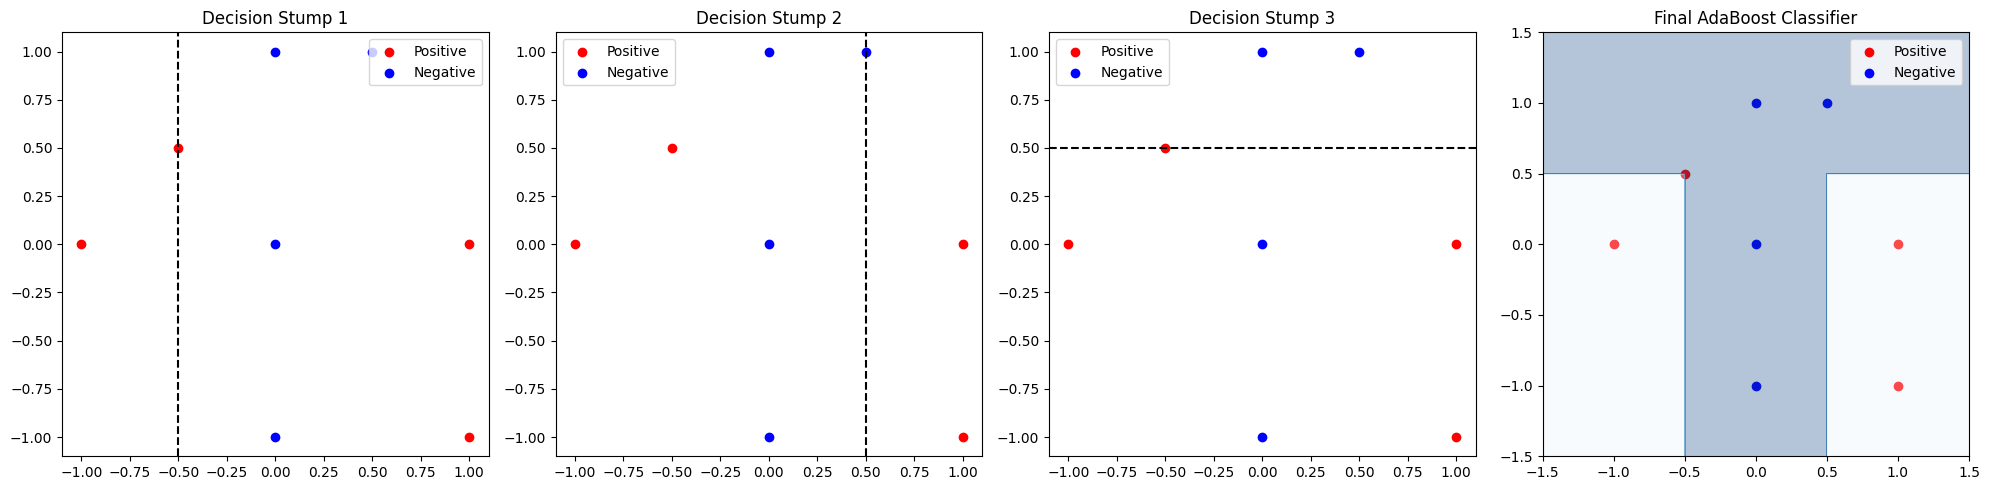

In [5]:
# Define the decision stumps based on the identified parameters
def stump1(X):
    return np.where(X[:, 0] > -0.5, 1, -1)

def stump2(X):
    return np.where(X[:, 0] <= 0.5, 1, -1)

def stump3(X):
    return np.where(X[:, 1] > 0.5, 1, -1)

stumps = [stump1, stump2, stump3]
alphas = [0.5493, 0.8047, 1.0986]

# Create subplots
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Plot data points
for i in range(3):
    y_pred = stumps[i](X)
    ax[i].scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='r', label='Positive')
    ax[i].scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='b', label='Negative')
    if i == 0:
        ax[i].axvline(-0.5, linestyle='--', color='k')
    elif i == 1:
        ax[i].axvline(0.5, linestyle='--', color='k')
    elif i == 2:
        ax[i].axhline(0.5, linestyle='--', color='k')
    ax[i].set_title(f"Decision Stump {i+1}")
    ax[i].legend()

# Final AdaBoost classifier
def final_classifier(X):
    return np.sign(sum(alphas[t] * stumps[t](X) for t in range(3)))

y_final_pred = final_classifier(X)
ax[3].scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='r', label='Positive')
ax[3].scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='b', label='Negative')
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 500), np.linspace(-1.5, 1.5, 500))
zz = final_classifier(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax[3].contourf(xx, yy, zz, alpha=0.3, cmap='Blues')
ax[3].set_title("Final AdaBoost Classifier")
ax[3].legend()

plt.tight_layout()
plt.show()


# Question 3. Random forest and one-class SVM for email spam classifier. 

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn import tree

### Question 3.1

In [7]:
# Load the data
data_path = 'data/spambase.data'
column_names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our",
                "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
                "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses",
                "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
                "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
                "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
                "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
                "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
                "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
                "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average",
                "capital_run_length_longest", "capital_run_length_total", "is_spam"]

# Read data into DataFrame
df = pd.read_csv(data_path, header=None, names=column_names)

# Fill missing values with zero (if any)
df.fillna(0, inplace=True)

In [11]:
# Fit a CART model
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values


clf = clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X, Y)

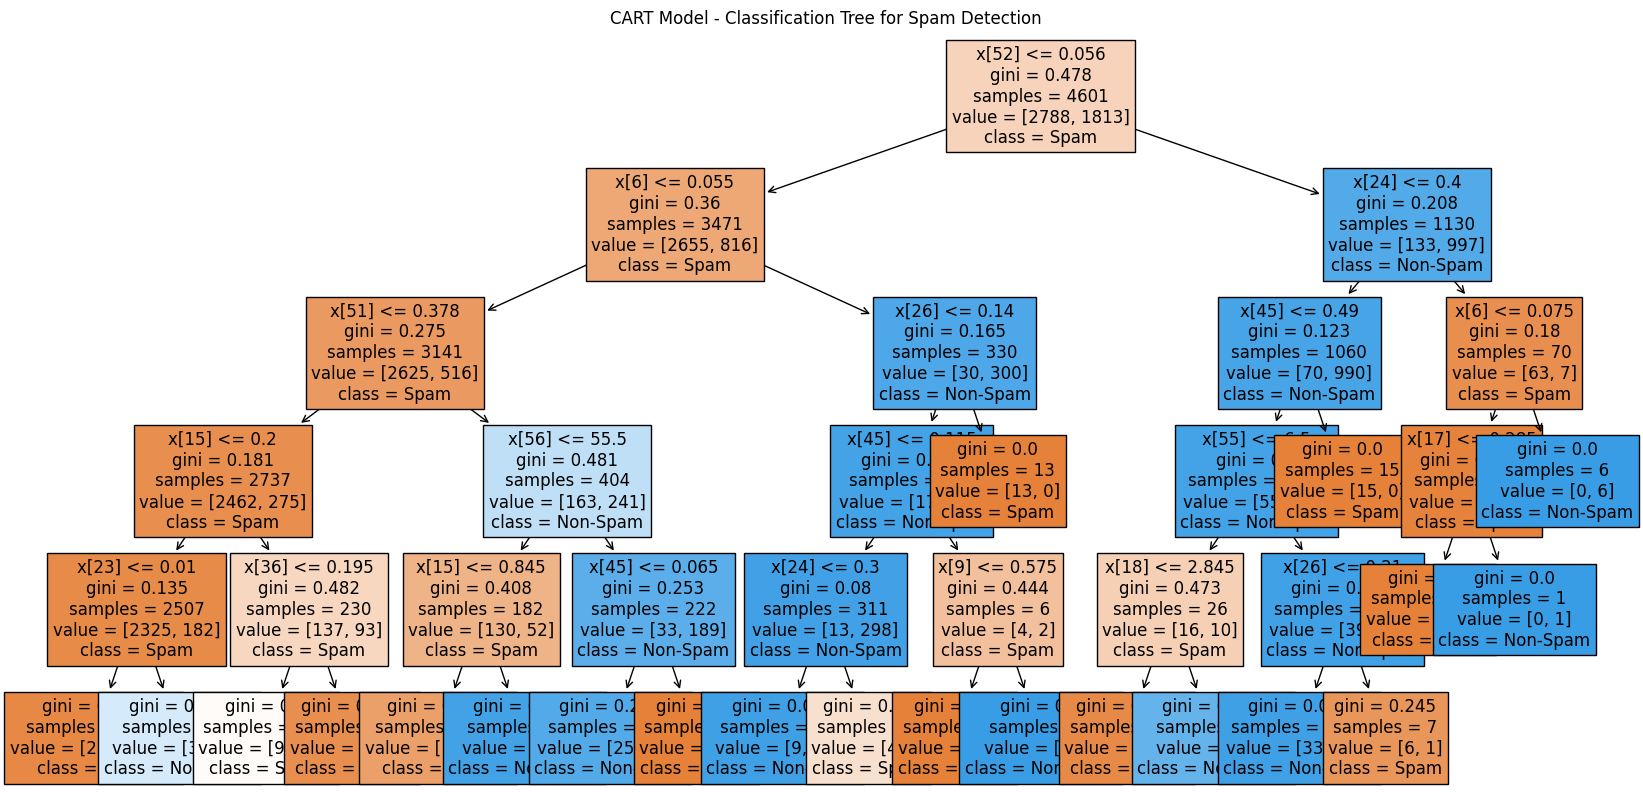

In [12]:
# Split the data into features and target
X = df.drop(columns=['is_spam'])
y = df['is_spam']

# Split (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# CART model
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

# Visualize 
plt.figure(figsize=(20, 10))
tree.plot_tree(clf,class_names = ['Spam','Non-Spam'], fontsize=12, filled=True) 
plt.title("CART Model - Classification Tree for Spam Detection")
plt.show()


### Question 3.2

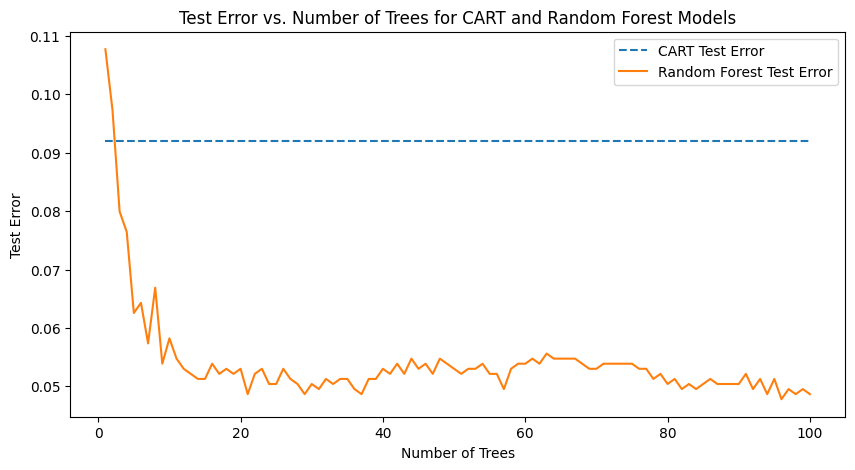

In [13]:
# Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict and calculate test errors 
cart_test_pred = cart_model.predict(X_test)
rf_test_pred = random_forest_model.predict(X_test)

cart_test_error = np.mean(cart_test_pred != y_test)
rf_test_error = np.mean(rf_test_pred != y_test)

# Prepare data to plot the error rate versus number of trees for Random Forest
error_rate_rf = []
for n in range(1, 101):
    temp_rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    temp_rf_model.fit(X_train, y_train)
    temp_rf_pred = temp_rf_model.predict(X_test)
    temp_rf_error = np.mean(temp_rf_pred != y_test)
    error_rate_rf.append(temp_rf_error)

plt.figure(figsize=(10, 5))

plt.plot([1, 100], [cart_test_error, cart_test_error], label="CART Test Error", linestyle='--')
plt.plot(range(1, 101), error_rate_rf, label="Random Forest Test Error")
plt.title('Test Error vs. Number of Trees for CART and Random Forest Models')
plt.xlabel('Number of Trees')
plt.ylabel('Test Error')
plt.legend()

# Display the combined plot
plt.show()



In [14]:
cart_test_error

0.09209383145091225

In [15]:
rf_test_error

0.04865334491746308

### Question 3.3

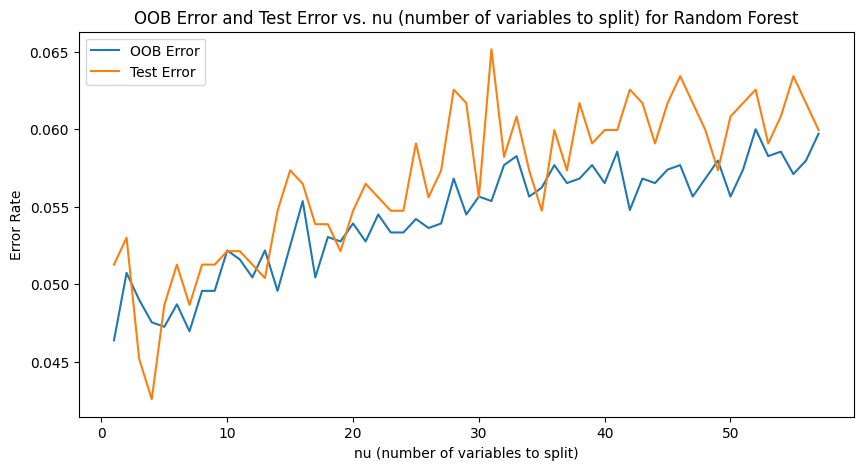

In [16]:
# Sensitivity analysis for Random Forest with varying 'max_features' parameter (nu)
oob_errors = []
test_errors = []
nu_values = range(1, X_train.shape[1] + 1)

for nu in nu_values:
    temp_rf_model = RandomForestClassifier(n_estimators=100, max_features=nu, random_state=42, oob_score=True)
    temp_rf_model.fit(X_train, y_train)
    oob_errors.append(1 - temp_rf_model.oob_score_)
    temp_rf_pred = temp_rf_model.predict(X_test)
    temp_rf_error = np.mean(temp_rf_pred != y_test)
    test_errors.append(temp_rf_error)

# Plot OOB error and test error against the nu values
plt.figure(figsize=(10, 5))
plt.plot(nu_values, oob_errors, label="OOB Error")
plt.plot(nu_values, test_errors, label="Test Error")
plt.title('OOB Error and Test Error vs. nu (number of variables to split) for Random Forest')
plt.xlabel('nu (number of variables to split)')
plt.ylabel('Error Rate')
plt.legend()
plt.show()


### Question 3.4

In [17]:
# Shuffle the data and split (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Extract all non-spam emails from the training data
X_train_non_spam = X_train[y_train == 0]

# Standardize the data (important for SVM)
scaler = StandardScaler()
X_train_non_spam_scaled = scaler.fit_transform(X_train_non_spam)
X_test_scaled = scaler.transform(X_test)

# Build the one-class SVM model with RBF kernel
one_class_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)
one_class_svm.fit(X_train_non_spam_scaled)

# Apply the model to the test data
test_pred_svm = one_class_svm.predict(X_test_scaled)
test_pred_svm = np.where(test_pred_svm == 1, 0, 1)  
# Convert predictions: 1 (inliers) -> 0 (non-spam), -1 (outliers) -> 1 (spam)

# Calculate the total misclassification error rate
svm_test_error = np.mean(test_pred_svm != y_test)

svm_test_error


0.2510860121633362

# Question 4. Locally weighted linear regression and bias-variance tradeoff. 

In [18]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

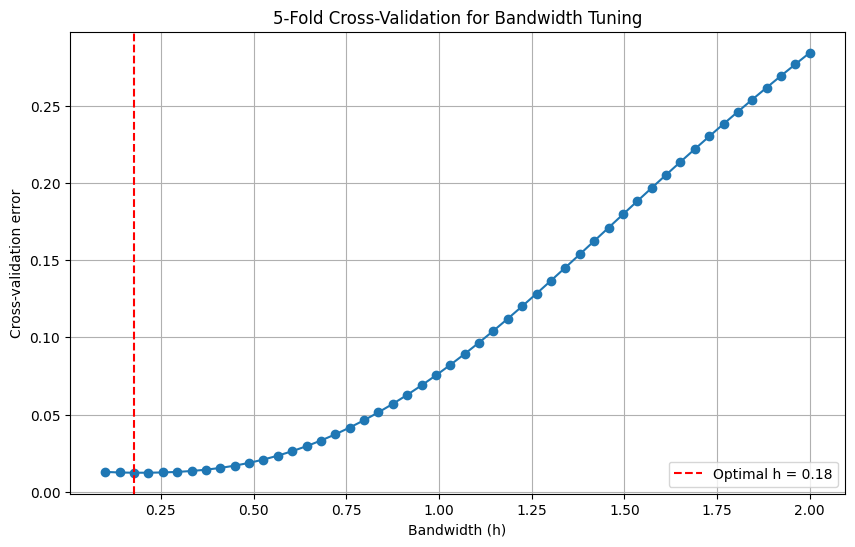

0.17755102040816328

In [19]:
# Load the data
data = scipy.io.loadmat('data/data.mat')

# Extract the correct x and y values
data_values = data['data']
x = data_values[:, 0]
y = data_values[:, 1]

# Define Gaussian kernel function
def gaussian_kernel(z, h):
    return np.exp(-z**2 / (2 * h**2)) / np.sqrt(2 * np.pi * h**2)

# Define local linear regression function
def local_linear_regression(x_train, y_train, x_query, h):
    m = len(x_train)
    W = np.diag(gaussian_kernel(x_train - x_query, h))
    X = np.vstack((np.ones(m), x_train)).T
    beta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y_train
    y_pred = beta[0] + beta[1] * x_query
    return y_pred

# Perform 5-fold cross-validation to tune the bandwidth parameter h
kf = KFold(n_splits=5, shuffle=True, random_state=1)
h_values = np.linspace(0.1, 2.0, 50)
errors = []

for h in h_values:
    cv_errors = []
    for train_index, val_index in kf.split(x):
        x_train, x_val = x[train_index], x[val_index]
        y_train, y_val = y[train_index], y[val_index]
        y_val_pred = [local_linear_regression(x_train, y_train, xi, h) for xi in x_val]
        cv_errors.append(np.mean((y_val - y_val_pred) ** 2))
    errors.append(np.mean(cv_errors))

# Find the optimal bandwidth
optimal_h = h_values[np.argmin(errors)]

# Plot cross-validation curve
plt.figure(figsize=(10, 6))
plt.plot(h_values, errors, marker='o')
plt.xlabel('Bandwidth (h)')
plt.ylabel('Cross-validation error')
plt.title('5-Fold Cross-Validation for Bandwidth Tuning')
plt.axvline(optimal_h, color='r', linestyle='--', label=f'Optimal h = {optimal_h:.2f}')
plt.legend()
plt.grid(True)
plt.show()

optimal_h



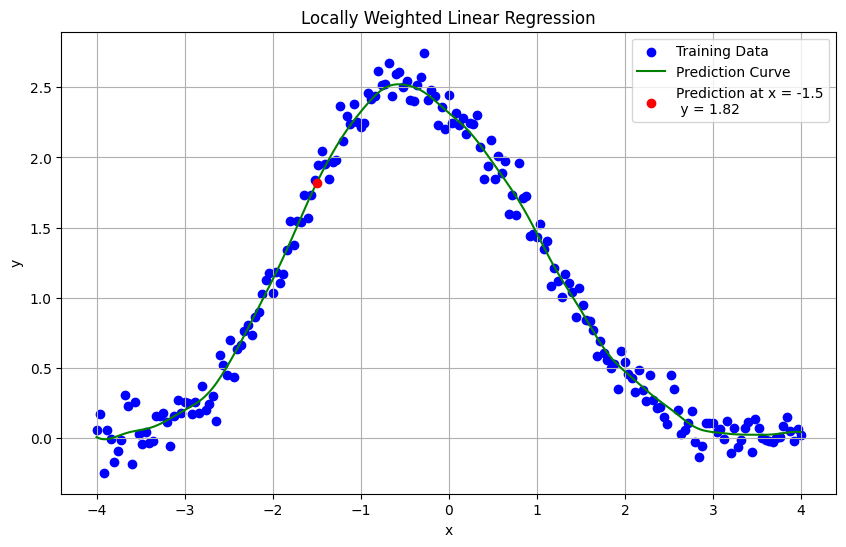

1.8187907164039732

In [20]:
x_query = -1.5
y_pred = local_linear_regression(x, y, x_query, optimal_h)

# Generate prediction curve
x_pred = np.linspace(min(x), max(x), 300)
y_pred_curve = [local_linear_regression(x, y, xi, optimal_h) for xi in x_pred]

# Plot the training data and prediction curve
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Training Data')
plt.plot(x_pred, y_pred_curve, color='green', label='Prediction Curve')
plt.scatter(x_query, y_pred, color='red', label=f'Prediction at x = {x_query}\n y = {y_pred:.2f}', zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Locally Weighted Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

y_pred
